In [61]:
import numpy as np

In [62]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [63]:
data_stat = np.load('../../data/transmon/static_spectrum_wq=0.25.npz')

data_ad = np.load('../../data/transmon/floquet_spectrum/w_r=0.75_N_rep=15_n_states=20_dim=110.npz')
data_diab = np.load('../../data/transmon/floquet_spectrum/w_r=1.25_N_rep=15_n_states=20_dim=110.npz')

data = [data_ad, data_diab]

evals = []

wr = []

ref_static, A_list, wq = data_stat['evals'], data_stat['e0_list'], data_stat['wq']

for j in range(2):
    evals.append(data[j]['evals_list'])
    wr.append(data[j]['w_r'])
    N_replicas = data[j]['N_replicas']

reff = ref_static[int((np.shape(ref_static)[0]-1)/2),0]

ref_static = ref_static - np.min(reff)

for idx in range(2):
    for j in range(7):
        evals[idx][j] = evals[idx][j] - np.min(reff)

In [64]:
data = np.load('../../data/transmon/g_parallel/N_rep=15_n_states=20_dim=110_num_w=101.npz', allow_pickle=True)

Alist, wlist, g_parallel = data['Alist'], data['wlist'], data['g_parallel']

In [65]:
data_ad = np.load('../../data/transmon/single_case/A_q=0.04_w_d=0.77_w_d_disp=0.77_N_fock=8_N_rep=5_n_states=8_dim=110_compensation=True_dispersive=False.npz')
data_diab = np.load('../../data/transmon/single_case/A_q=0.04_w_d=1.25_w_d_disp=1.25_N_fock=8_N_rep=5_n_states=8_dim=110_compensation=True_dispersive=False.npz')

data = [data_ad, data_diab]

exp_a = [[],[]]
exp_a_an = [[],[]]

for idx in range(2):
    exp_a[idx], exp_a_an[idx], tlist, A_Q, g, kappa, w_ad, wq = data[idx]['exp_a'], \
    data[idx]['exp_a_an'], data[idx]['tlist'], data[idx]['A_q'], data[idx]['g'], data[idx]['kappa'], data[idx]['w'], data[idx]['wq']

In [66]:
data_n_operator = np.load('../../data/params/transmon.npz', allow_pickle=True)

drive_op = data_n_operator['drive_op']
H_sys = data_n_operator['H_sys']

 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/collections.py: 197ComplexWarning: Casting complex values to real discards the imaginary part
 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/collections.py: 1403ComplexWarning: Casting complex values to real discards the imaginary part
 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/cbook.py: 1762ComplexWarning: Casting complex values to real discards the imaginary part
 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/cbook.py: 1398UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
 /tmp/ipykernel_26068/2803822686.py: 287UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
 /tmp/ipykernel_26068/2803822686.py: 295UserWarning: The figure layout has changed to tight
 /tmp/ipykernel_26068/2803822686.py: 295

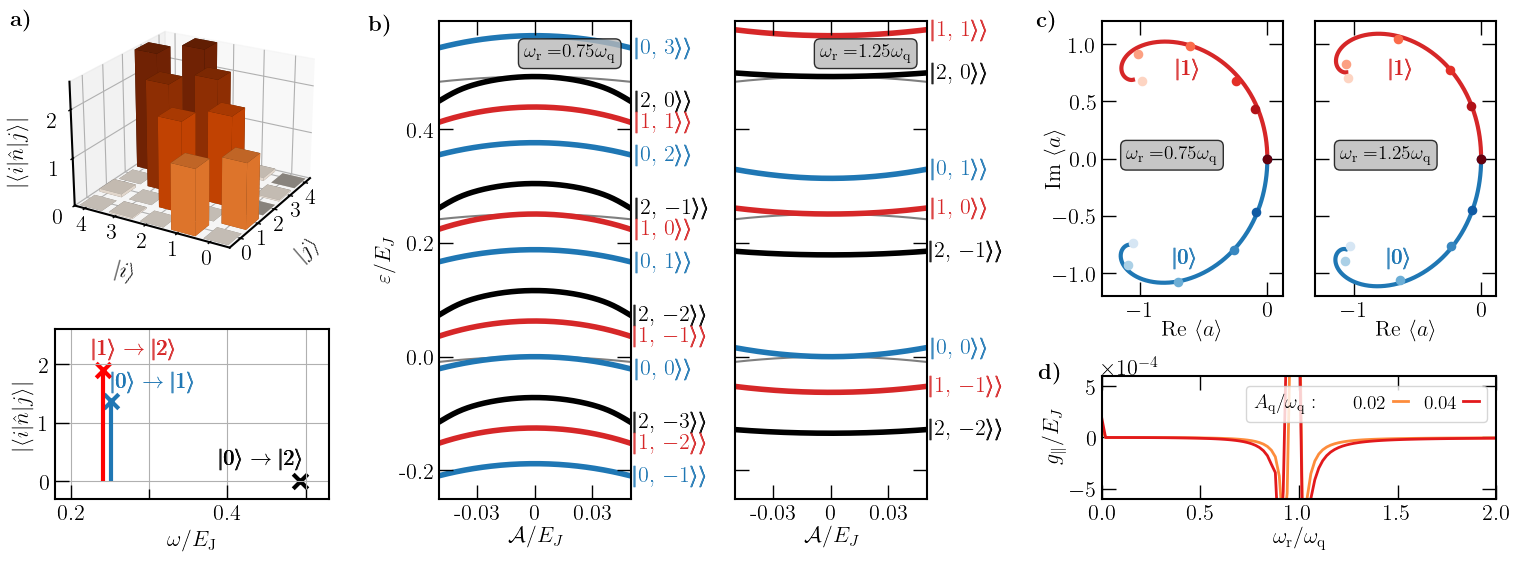

In [67]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scqubits.utils.plot_utils import (
    color_normalize,
)
from matplotlib import collections as matcoll

cmap = mpl.colormaps["tab10"]

%matplotlib inline

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(18.6,6.2), layout="constrained")

gs0 = gridspec.GridSpec(4, 9, figure=fig, height_ratios=[0.65,0.04,0.04,0.35], width_ratios=[0.5,0.08,0.35,0.07,0.35,0.1,0.04,0.33,0.33], hspace=0.35, wspace=0.25)

axes = fig.add_subplot(gs0[0,0], projection="3d")
ax_matrix_el = fig.add_subplot(gs0[2:4,0])
ax_floquet_ad = fig.add_subplot(gs0[0:4,2])
ax_floquet_diab = fig.add_subplot(gs0[0:4,4])

ax_floquet = [ax_floquet_ad, ax_floquet_diab]

ax_IQ_ad = fig.add_subplot(gs0[0:2,7])
ax_IQ_diab = fig.add_subplot(gs0[0:2,8])

ax_IQ = [ax_IQ_ad, ax_IQ_diab]

ax_g_parallel = fig.add_subplot(gs0[3,7:9])

################### n_operator ##################################
matrix = drive_op[0:5,0:5]

mode = "abs"

y_count, x_count = matrix.shape  # We label the columns as "x", while rows as "y"
element_count = x_count * y_count  # total num. of elements to plot

xgrid, ygrid = np.meshgrid(range(x_count), range(y_count))
xgrid = xgrid.flatten()
ygrid = ygrid.flatten()

zbottom = np.zeros(element_count)  # all bars start at z=0
dx, dy = 0.75, 0.75  # width of bars in x and y directions

modefunction = np.abs
zheight = modefunction(matrix).flatten()  # height of bars from matrix elements

min_zheight, max_zheight, nrm = color_normalize(zheight, mode)
colors = plt.cm.Oranges(nrm(zheight))  # list of colors for each bar

# skyscraper plot
axes.view_init(azim=210, elev=23)
axes.bar3d(xgrid, ygrid, zbottom, dx, dy, zheight, color=colors)

if mode in ["real", "imag"]:
    min_zheight = 0 if min_zheight > 0 else min_zheight
    max_zheight = 0 if max_zheight < 0 else max_zheight

if min_zheight == max_zheight:
    # pad with small values so we don't get warnings
    max_zheight += 0.0000001

axes.set_zlim3d([min_zheight, max_zheight])

for axis, locs in [
    (axes.xaxis, np.arange(x_count)),
    (axes.yaxis, np.arange(y_count)),
]:
    axis.set_ticks(locs + 0.5, minor=True)
    axis.set(ticks=locs + 0.5, ticklabels=locs)

axes.tick_params(axis="x", pad=-5)
axes.tick_params(axis="y", pad=-5)
axes.tick_params(axis="z", pad=-2)

axes.set_xlabel(r"$\vert j \rangle$", labelpad=-1)
axes.set_ylabel(r"$\vert i \rangle$", labelpad=-1)
axes.zaxis.set_rotate_label(False)  # disable automatic rotation
axes.set_zlabel(r'$\vert \langle i \vert \hat{n} \vert j \rangle \vert$', labelpad=-3, rotation=90)

axes.set_box_aspect(None, zoom=1.2)

x = [H_sys[1,1]-H_sys[0,0], H_sys[2,2]-H_sys[1,1], H_sys[2,2]-H_sys[0,0]]
y = [np.abs(drive_op[0,1]), np.abs(drive_op[1,2]), np.abs(drive_op[0,2])]

COLORS = ['tab:blue', 'red', 'black']

lines = []
for i in range(len(x)):
    ax_matrix_el.scatter(x[i], y[i], marker='x', s=110, facecolors=COLORS[i], linewidths=3)
    pair=[(x[i],0), (x[i], y[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors=[COLORS[0],COLORS[1],COLORS[2]], linewidth=3)
ax_matrix_el.add_collection(linecoll) 

ax_matrix_el.grid(which='both')

ax_matrix_el.set_xlabel(r'$\omega/E_{\rm J}$')
ax_matrix_el.set_ylabel(r'$\vert \langle i \vert \hat{n} \vert j \rangle \vert$')

ax_matrix_el.set_xlim([0.18,0.53])
ax_matrix_el.set_ylim([-0.3,2.6])

# Major ticks every 20, minor ticks every 5
major_ticks = [0.2,0.4]
minor_ticks = [0.2,0.3,0.4,0.5]

ax_matrix_el.set_xticks(major_ticks)
ax_matrix_el.set_xticks(minor_ticks, minor=True)

ax_matrix_el.xaxis.set_tick_params(direction="in", which='both')
ax_matrix_el.yaxis.set_tick_params(direction="in", which='both')

ax_matrix_el.text(0.52, 0.753, r'$\pmb{\left\vert 0 \right\rangle}\rightarrow\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el.transAxes, color = 'tab:blue')
ax_matrix_el.text(0.45, 0.95, r'$\pmb{\left\vert 1 \right\rangle}\rightarrow\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el.transAxes, color = 'tab:red')
ax_matrix_el.text(0.915, 0.3, r'$\pmb{\left\vert 0 \right\rangle}\rightarrow\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el.transAxes, color = 'black')

################### Spectrum ##################################
for idx in range(2):
    ax_floquet[idx].plot(A_list, ref_static[:,0], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet[idx].plot(A_list, ref_static[:,1], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet[idx].plot(A_list, ref_static[:,2], c='black', zorder=0, alpha=0.5, ls='-')

    for j,current_replica in enumerate(N_replicas):
        ax_floquet[idx].plot(A_list, evals[idx][j][:,0], zorder=1, lw=4, c='tab:blue')
        ax_floquet[idx].plot(A_list, evals[idx][j][:,1], zorder=1, lw=4, c='tab:red')
        ax_floquet[idx].plot(A_list, evals[idx][j][:,2], zorder=1, lw=4, c='black', alpha=1)

        if current_replica < 0 :        
            string_current_replica = r'$-$'+str(np.abs(current_replica))
            offset = 0.041
        else :
            string_current_replica = str(np.abs(current_replica))
            offset = 0.033

        if idx == 0:
            if current_replica > -2:
                ax_floquet[idx].text(A_list[-1]+offset, evals[idx][j][:,0][-1]-0.01, r'$\pmb{\vert}$'+'$0$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:blue')
            if current_replica < 2 and current_replica > -3:
                ax_floquet[idx].text(A_list[-1]+offset, evals[idx][j][:,1][-1]-0.01, r'$\pmb{\vert}$'+'$1$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:red')
            if current_replica < 1:
                if current_replica == -1:
                    ax_floquet[idx].text(A_list[-1]+offset+0.001, evals[idx][j][:,2][-1]-0.01, r'$\pmb{\vert}$'+'$2$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                        size=16, c='black')
                else:
                    ax_floquet[idx].text(A_list[-1]+offset, evals[idx][j][:,2][-1]-0.01, r'$\pmb{\vert}$'+'$2$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                    size=16, c='black')

        if idx == 1:
            if current_replica > -1 and current_replica < 2:
                ax_floquet[idx].text(A_list[-1]+offset, evals[idx][j][:,0][-1]-0.01, r'$\pmb{\vert}$'+'$0$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:blue')
            if current_replica < 2 and current_replica > -2:
                ax_floquet[idx].text(A_list[-1]+offset, evals[idx][j][:,1][-1]-0.01, r'$\pmb{\vert}$'+'$1$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:red')
            if current_replica < 1 and current_replica > -3:
                ax_floquet[idx].text(A_list[-1]+offset, evals[idx][j][:,2][-1]-0.01, r'$\pmb{\vert}$'+'$2$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='black')


    ax_floquet[idx].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet[idx].yaxis.set_tick_params(direction="in", which='both')

    ax_floquet[idx].set_xlabel(r'$\mathcal{A}/E_J$', labelpad=1)
    ax_floquet[idx].text(0.92, 0.925, r'$\omega_{\text{r}}=$'+str(np.round(wr[idx]/wq,2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet[idx].transAxes, size=14)

    ax_floquet[idx].set_ylim([-0.25,0.59])
    ax_floquet[idx].set_xticks([-0.03,0.0,0.03],['-0.03','0','0.03'])
    ax_floquet[idx].set_yticks([-0.2,0.0,0.2,0.4],['-0.2','0.0','0.2','0.4'])

ax_floquet[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_floquet[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_floquet[0].set_ylabel(r'$\varepsilon/E_J$', labelpad=2)

################### IQ ##################################
x_list = [0,0.5,1,2,4,8]

norm = mpl.colors.Normalize(vmin=0, vmax=len(x_list))

cmap_b = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Blues'].reversed())
cmap_b.set_array([])

cmap_r = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Reds'].reversed())
cmap_r.set_array([])

cmap = [cmap_b, cmap_r]

qubit_state_list = [0,1]

dictionary = {}

for idxx in range(2):
    ax_IQ[idxx].plot(exp_a_an[idxx][0].real,exp_a_an[idxx][0].imag, c='tab:blue', lw=3)
    ax_IQ[idxx].plot(exp_a_an[idxx][1].real,exp_a_an[idxx][1].imag, c='tab:red', lw=3)

    for q_idx,qubit_state in enumerate(qubit_state_list):

        for index,i in enumerate(x_list):
            idx = np.where(np.abs(tlist*kappa-i)<0.01)[0][0]
            
            if q_idx == 0:
                point_blue = ax_IQ[idxx].scatter(exp_a[idxx][q_idx][idx].real, exp_a[idxx][q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
                dictionary[f'point_blue_{index}'] = point_blue
            else:
                point_red = ax_IQ[idxx].scatter(exp_a[idxx][q_idx][idx].real, exp_a[idxx][q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
                dictionary[f'point_red_{index}'] = point_red

    ax_IQ[idxx].xaxis.set_tick_params(direction="in", which='both')
    ax_IQ[idxx].yaxis.set_tick_params(direction="in", which='both')

    ax_IQ[idxx].set_ylim([-1.2,1.2])
    ax_IQ[idxx].set_xlim([-1.3,0.12])

    ax_IQ[idxx].text(0.555,0.87,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_IQ[idxx].transAxes, color = 'tab:red', \
            fontsize=16)
    ax_IQ[idxx].text(0.54,0.18,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_IQ[idxx].transAxes, color = 'tab:blue', \
            fontsize=16)

    legend_list = []
    legend_list_name = []
    for iindex, ii in enumerate(x_list):
        legend_list.append((dictionary[f'point_blue_{iindex}'], dictionary[f'point_red_{iindex}']))
        if iindex == 1:
            legend_list_name.append('.5')
        else:
            legend_list_name.append(f'{ii}')

    ax_IQ[idxx].set_xlabel(r'Re $\langle a \rangle$', labelpad=-1)

    ax_IQ[idxx].text(0.64, 0.5, r'$\omega_{\text{r}}=$'+str(np.round(wr[idxx]/wq,2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_IQ[idxx].transAxes, size=14)

ax_IQ[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                labelbottom=True, labelright=False, labeltop=False, which='both')
ax_IQ[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                labelbottom=True, labelright=False, labeltop=False, which='both')

ax_IQ[0].set_ylabel(r'Im $\langle a \rangle$', labelpad=-10)

########## g_parallel #####################
cmap_plot = plt.get_cmap('YlOrRd')
norm = plt.Normalize(-2,2)
colors = cmap_plot(norm([i for i in range(len(Alist))]))

for idx, A_Q in enumerate(Alist[0:2]):
    ax_g_parallel.plot(wlist/wq, g_parallel[:,idx], label=np.round(A_Q/wq,2), color=colors[idx], lw=2)

ax_g_parallel.xaxis.set_tick_params(direction="in", which='both')
ax_g_parallel.yaxis.set_tick_params(direction="in", which='both')

ax_g_parallel.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_g_parallel.set_ylabel(r'$g_\parallel/E_J$', labelpad=2)

import matplotlib.ticker as mticker

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))

ax_g_parallel.yaxis.set_major_formatter(formatter)

ax_g_parallel.set_ylim([-0.0006,0.0006])

ax_g_parallel.set_xlabel(r'$\omega_{\rm r}/\omega_{\rm q}$', labelpad=2)

h, l = ax_g_parallel.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = [r'$A_{\text{q}}/\omega_{\text{q}}:$'] + l  # Merging labels
leg = ax_g_parallel.legend(handles, labels, fontsize="14", loc='upper right', ncol=3, handlelength=0.8, markerfirst=False, handletextpad=0.3, columnspacing=0.8)

fname = '../figures/figS4'

fname = fname + '.pdf'
plt.savefig(fname, bbox_inches='tight')

labels = ['a)','b)','c)','d)']
axes.text2D(-0.3, 0.98, r'\bf{'+labels[0]+'}', size=16, color='black', transform=axes.transAxes)
ax_floquet[0].text(-0.37, 0.98, r'\bf{'+labels[1]+'}', size=16, color='black', transform=ax_floquet[0].transAxes)
ax_IQ[0].text(-0.36, 0.98, r'\bf{'+labels[2]+'}', size=16, color='black', transform=ax_IQ[0].transAxes)
ax_g_parallel.text(-0.16, 0.98, r'\bf{'+labels[3]+'}', size=16, color='black', transform=ax_g_parallel.transAxes)

plt.tight_layout()

fig.savefig(fname, bbox_inches='tight')